In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
!wget https://www.dropbox.com/s/47od3by2b2vgk22/apples.zip?dl=0

--2022-08-03 15:53:55--  https://www.dropbox.com/s/47od3by2b2vgk22/apples.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/47od3by2b2vgk22/apples.zip [following]
--2022-08-03 15:53:56--  https://www.dropbox.com/s/raw/47od3by2b2vgk22/apples.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfb3c3b867a39cef3216ef575fa.dl.dropboxusercontent.com/cd/0/inline/BqUaOrIg2dOFQwwK_4oWbJbvMU_qCe_x-R-byoqconJpUmlKD4xAAZWXfk8iQDuJUWF1V-oacc4jMFcNdnzk-YnM7P3CgrldezXAYBZRzCVWnwcKuozzE9_8YefInjaSkGR1qDSkeZQIl5cu--0gmZ93FKNtlxJAlfEljrg9Xieq8g/file# [following]
--2022-08-03 15:53:56--  https://ucfb3c3b867a39cef3216ef575fa.dl.dropboxusercontent.com/cd/0/inline/BqUaOrIg2dOFQwwK_4oWbJbvMU_qCe_x-R-byoqconJpUmlKD4xAAZWXfk8iQDuJUWF1V

In [2]:
!unzip apples.zip\?dl\=0

Streaming output truncated to the last 5000 lines.
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.00.56 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.01.09 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.01.21 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.01.38 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.01.54 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.02.02 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: apples/train/rottenapples/rotated_by_75_Screen Shot 2018-06-07 at 3.03.0

In [4]:
#Lae kasutades funktsiooni load_images_from_folder() sisse pildid mädanenud õuntest ning pildid tervetes õuntest

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            images.append(img)
    return images
freshapples = load_images_from_folder("apples/train/freshapples")
rottenapples = load_images_from_folder("apples/train/rottenapples")

freshapples=np.array(freshapples)
rottenapples=np.array(rottenapples)

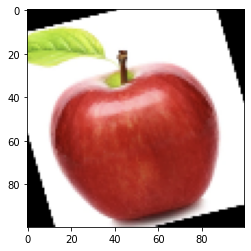

In [5]:
#Kuna mõningaid pilte nii tervetes kui ka mädadenud õuntest

plt.imshow(freshapples[100])

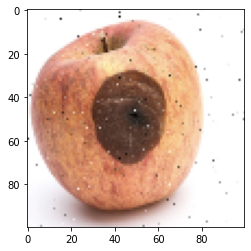

In [6]:
plt.imshow(rottenapples[100])

In [16]:
#Moodusta tervete ja mädanenud õunte jaoks märgendite järjendid

print(freshapples.shape)
print(rottenapples.shape)

labels_fresh = np.empty(1693, dtype="int")
labels_fresh[:] = 0
labels_rotten = np.empty(2342, dtype="int")
labels_rotten[:] = 1

(1693, 100, 100, 3)
(2342, 100, 100, 3)


In [17]:
#Pane omavahel kokku (samasse järjendisse) terved ja mädadenud õunte piltide järjendid ning lisaks pane oma vahel kokku (samasse järjendisse) tervete ja mädanenud õunte märgendid

apples = np.concatenate((freshapples, rottenapples))
labels = np.concatenate((labels_fresh, labels_rotten))

In [18]:
#Jaga piltide ja märgendite järjendid treenimis- ja testimishulkades kasutades funktsiooni train_test_split(...)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(apples, labels, test_size=0.33, random_state=42)

In [19]:
#Mudelina kasutame samat närvivõrku, mis on juba mälusse sisse loetud (kui oled eelmisi koodiblokke edaukalt käivitanud), kuid treeni seda mudelit nüüd
#uutel (õunte) piltidel (kasutades model.fit(...))

#importing required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
#Creating model

image_shape = (100,100,3)
batch_size = 32 #according your model and your choice

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)



In [20]:
history=model.fit(X_train,y_train,batch_size=20,validation_data=(X_test,y_test),epochs= 7)

Epoch 1/7
136/136 [==============================] - 17s 119ms/step - loss: 1.5872 - accuracy: 0.7281 - val_loss: 0.3944 - val_accuracy: 0.8438
Epoch 2/7
136/136 [==============================] - 16s 116ms/step - loss: 0.3001 - accuracy: 0.8853 - val_loss: 0.2771 - val_accuracy: 0.9054
Epoch 3/7
136/136 [==============================] - 17s 123ms/step - loss: 0.2031 - accuracy: 0.9282 - val_loss: 0.2367 - val_accuracy: 0.9114
Epoch 4/7
136/136 [==============================] - 16s 119ms/step - loss: 0.1386 - accuracy: 0.9519 - val_loss: 0.1815 - val_accuracy: 0.9309
Epoch 5/7
136/136 [==============================] - 16s 117ms/step - loss: 0.1168 - accuracy: 0.9612 - val_loss: 0.3052 - val_accuracy: 0.8806
Epoch 6/7
136/136 [==============================] - 16s 115ms/step - loss: 0.0995 - accuracy: 0.9649 - val_loss: 0.1847 - val_accuracy: 0.9287
Epoch 7/7
136/136 [==============================] - 16s 115ms/step - loss: 0.1196 - accuracy: 0.9612 - val_loss: 0.1931 - val_accuracy:

In [ ]:
#Salvesta loodud mudeli ennustused testimishulga piltidel

pred_probability = model.predict(X_test)
predictions = pred_probability > 0.5

In [ ]:
#Kuva mudeli ennustustulemused, kasutades funktsiooni classification_report(...)
print(classification_report(y_test,predictions))